In [ ]:
!pip install -q ace_tools_open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ace_tools_open as tools

In [ ]:
"""

Benford's Law Analysis

- populations: Pandas Series with population numbers

Returns:
- TVD between the empirical and theoretical distributions, and some of the theoretical
characteristics of the empirical data (populations), such as the stopping probability
(p_S) and the maximum binary length (N) for Benford scaling invariance.

Outputs the histogram of leading digit frequencies for the population numbers,
and the theoretical Benford's distribution.

"""

def tvd_analysis_benford(populations, plots=True):

  # Extract leading digits
  leading_digits = populations.astype(str).str[0].astype(int)

  # Empirical Distribution
  empirical_counts = leading_digits.value_counts().sort_index()
  empirical_probs = empirical_counts / empirical_counts.sum()

  # Benford's Distribution
  benford_probs = {d: np.log10(1 + 1/d) for d in range(1, 10)}

  # Comparison using TVD
  tvd = 0.5 * sum(abs(empirical_probs.get(d, 0) - benford_probs[d]) for d in range(1, 10))

  # Visualization
  digits = np.array(range(1, 10))
  empirical_values = [empirical_probs.get(d, 0) for d in digits]
  benford_values = [benford_probs[d] for d in digits]

  if plots:
    plt.figure(figsize=(10, 6))
    plt.bar(digits, empirical_values, width=0.4, label='Empirical', align='center')
    plt.bar(digits, benford_values, width=0.4, label='Benford', align='edge')
    plt.xlabel('Leading Digit')
    plt.ylabel('Probability')
    plt.title('Leading Digit Distribution: Empirical vs. Benford\'s Law')
    plt.xticks(digits)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

  # Compute the binary lengths (number of bits) for each sampled number
  binary_lengths = np.array([len(bin(n)) - 2 for n in populations])  # Remove '0b' from binary representation

  # Determine the maximum number of bits (N) in the dataset
  N = np.max(binary_lengths)  # N is the maximum number of bits in the dataset
  p_S_empirical = 1.0 / np.mean(binary_lengths)  # Average over all estimates

  test_results_df = pd.DataFrame(
      {
          'TVD from Benford (theoretical)': [tvd],
          'Empirical Stopping Probability (p_S)': [p_S_empirical],
          'Maximum Binary Length (N)': [N],
          'Average Binary Length': [np.mean(binary_lengths)]
      }
  )

  return test_results_df

Generating 10000 binary numbers with probabilities:
p_0 = 0.32469081578810566, p_1 = 0.32469081578810566, p_S = 0.3506183684237887
Lambda = 1e-12


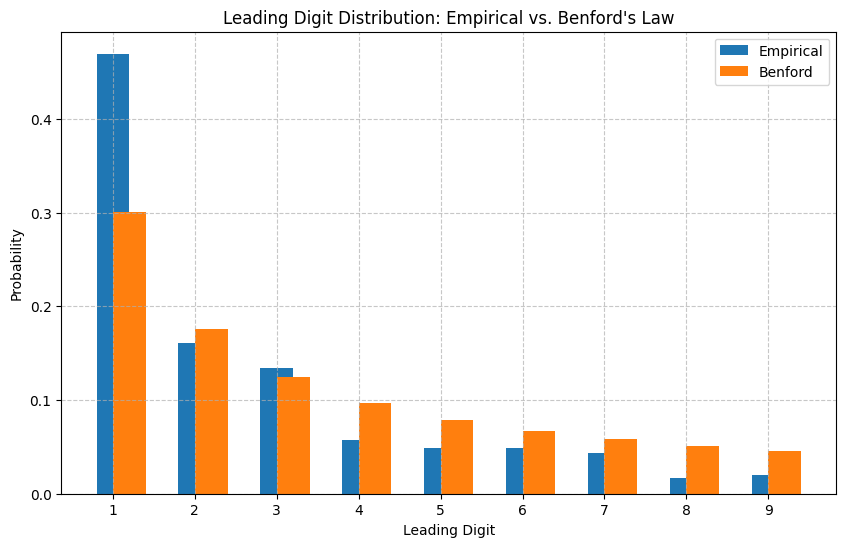

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.40292109388074093, p_1 = 0.40292109388074093, p_S = 0.19415781223851813
Lambda = 1e-06


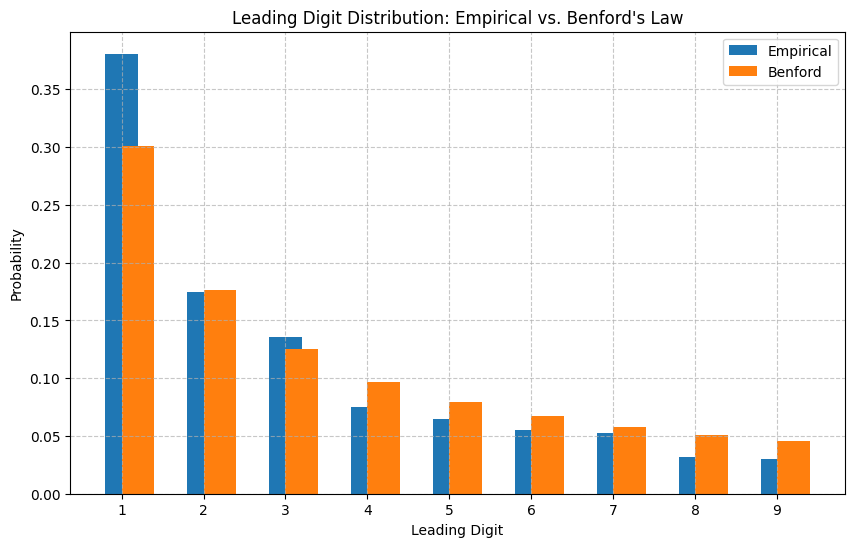

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4823308099555996, p_1 = 0.4823308099555996, p_S = 0.03533838008880075
Lambda = 0.1


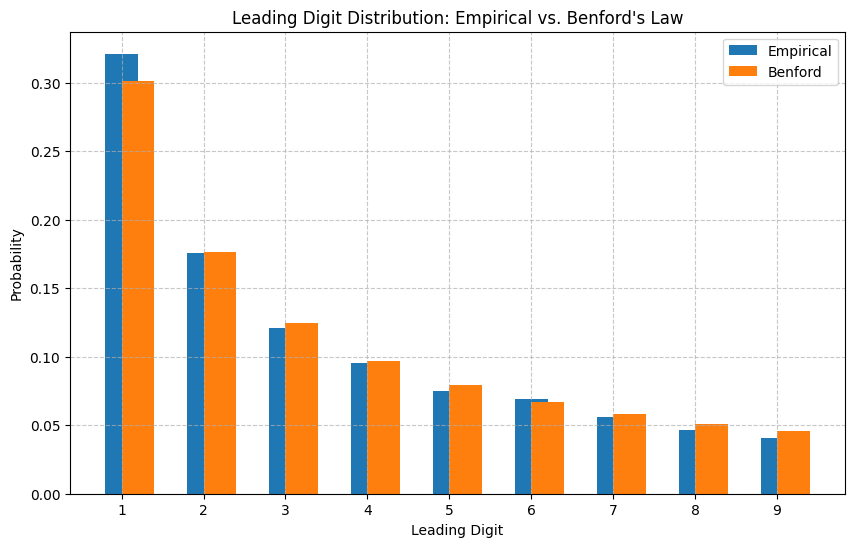

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.48867416669197467, p_1 = 0.48867416669197467, p_S = 0.02265166661605067
Lambda = 0.230759776818


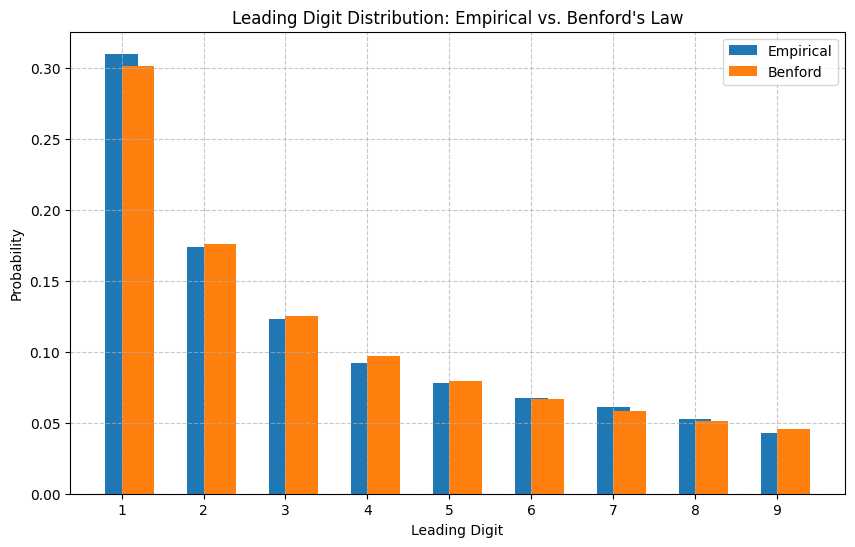

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4906818838173888, p_1 = 0.4906818838173888, p_S = 0.018636232365222383
Lambda = 0.3


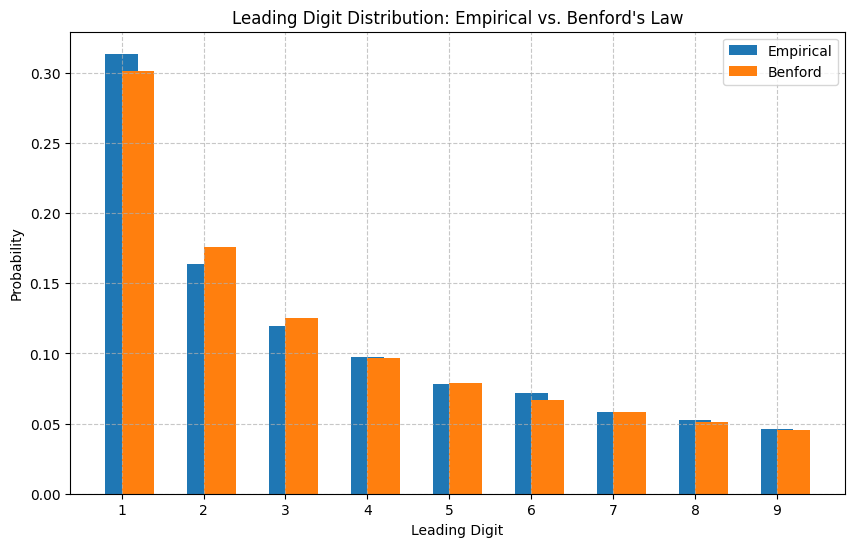

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.49289247940165787, p_1 = 0.49289247940165787, p_S = 0.014215041196684264
Lambda = 0.4


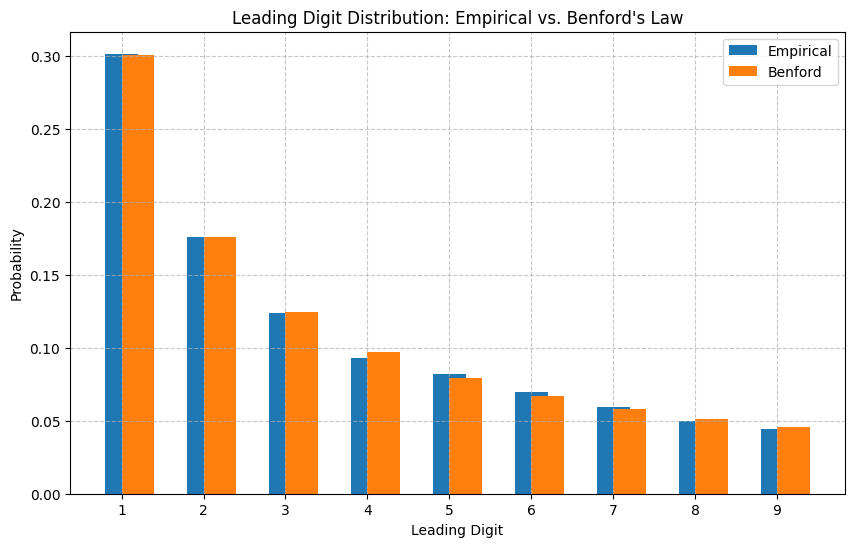

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.49461400659698773, p_1 = 0.49461400659698773, p_S = 0.010771986806024536
Lambda = 0.5


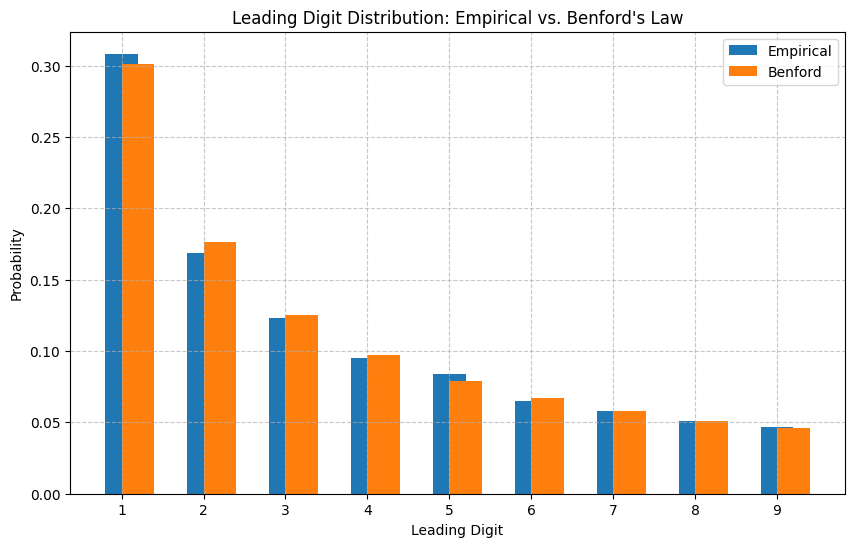

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4960250592106636, p_1 = 0.4960250592106636, p_S = 0.007949881578672824
Lambda = 0.6


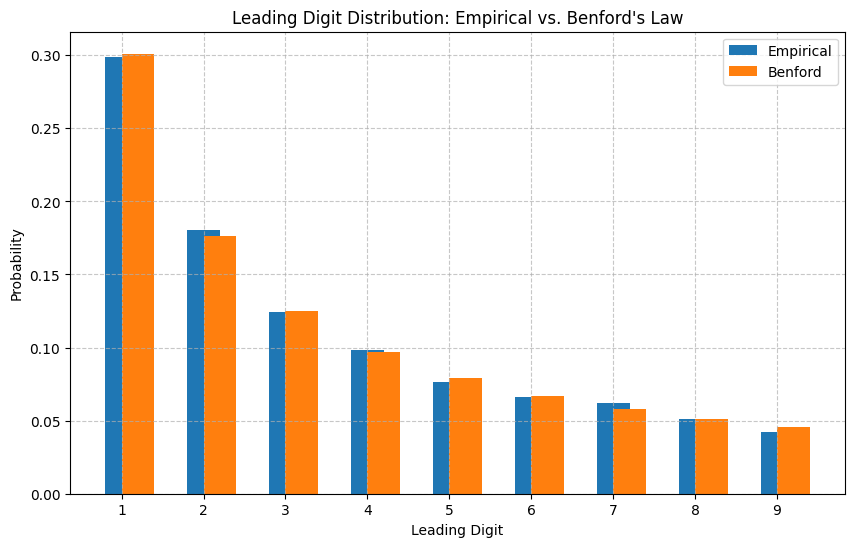

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4972212273066173, p_1 = 0.4972212273066173, p_S = 0.00555754538676545
Lambda = 0.7


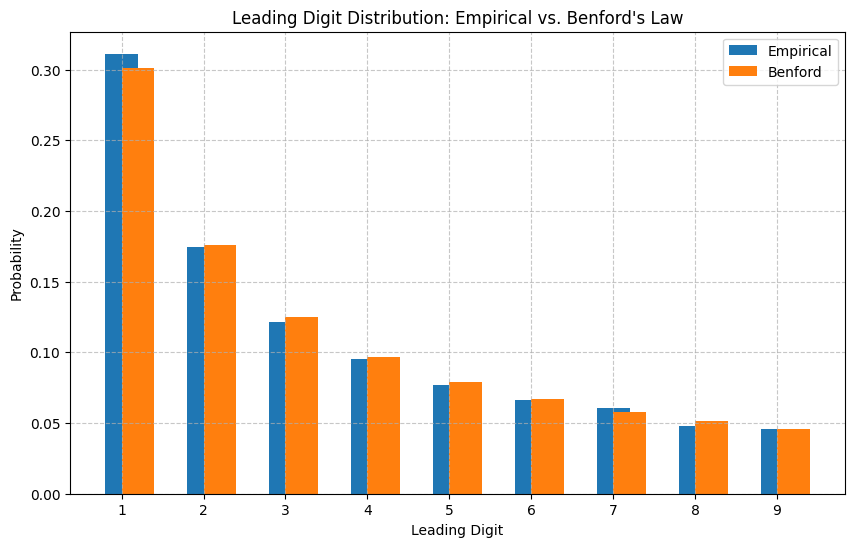

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4982597266025944, p_1 = 0.4982597266025944, p_S = 0.0034805467948112456
Lambda = 0.8


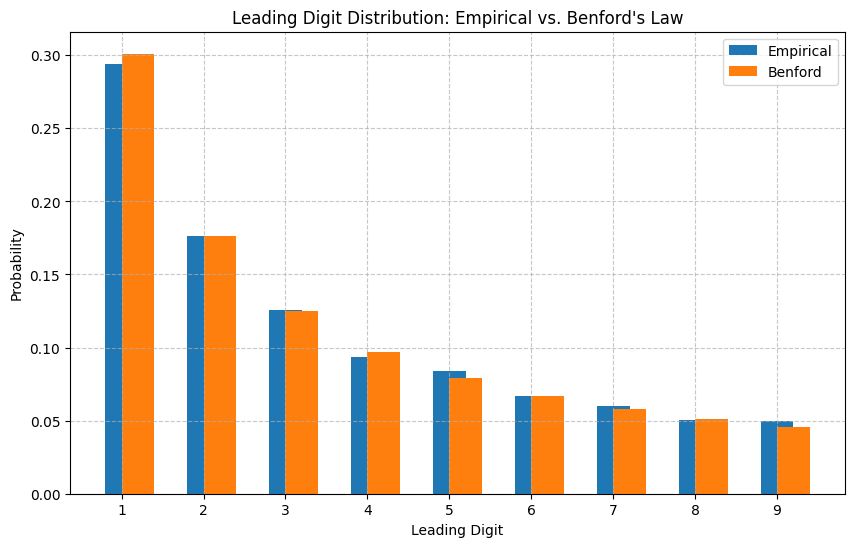

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4991775481411712, p_1 = 0.4991775481411712, p_S = 0.0016449037176575754
Lambda = 0.9


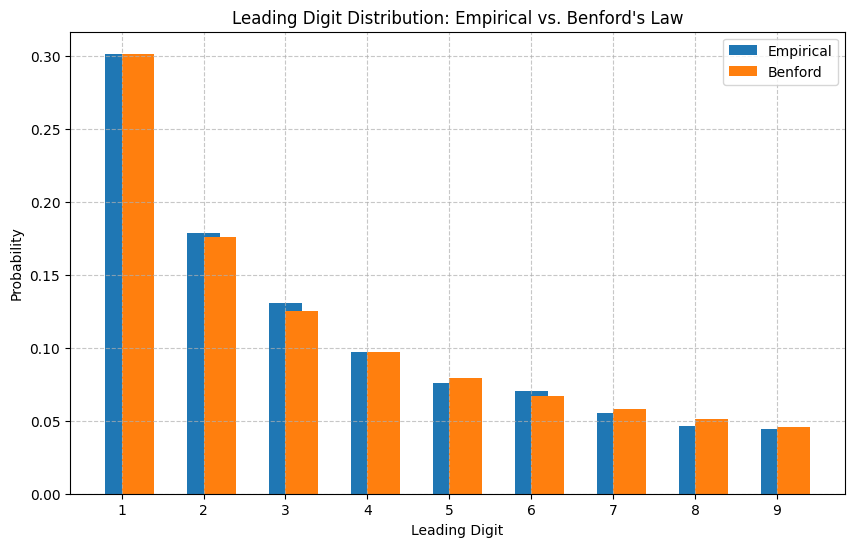

Test Results (Benford TVD Analysis)


In [ ]:
import sys
sys.set_int_max_str_digits(100_000)

"""

Generating binary numbers as strings with probabilities
- p_0 for '0',
- p_1 for '1',
- p_S for stopping.

"""

def generate_binary_number(p_0, p_1, p_S):
  """Generates a binary number according to the process."""
  binary_number = '1'  # Always start with a leading 1
  while True:
      r = np.random.rand()
      if r < p_S:
          break  # Stop the process
      elif r < p_S + p_0:
          binary_number += '0'
      else:
          binary_number += '1'
  return int(binary_number, 2)

"""

Running experiemnts with the model, comparison with Benford's law, and plotting.

"""

def run_experiments_benford(num_numbers, N, lambdas, plots=True):

  tvds_measured = []

  for l in lambdas:  # Loop over lambdas

    # Probabilities for binary strings generation
    p_S = 1 - l**(1/N)  # Stopping probability
    p_0 = p_1 = l**(1/N) / 2  # Probability of 0 or 1

    if plots:
      print(f"Generating {num_numbers} binary numbers with probabilities:")
      print(f"p_0 = {p_0}, p_1 = {p_1}, p_S = {p_S}")
      print(f"Lambda = {l}")

    # Generate binary numbers
    binary_numbers = pd.Series([generate_binary_number(p_0, p_1, p_S) for _ in range(num_numbers)], dtype="object")

    # Run TVD analysis
    binary_analysis = tvd_analysis_benford(binary_numbers, plots=plots)
    if plots:
      tools.display_dataframe_to_user(name="Test Results (Benford TVD Analysis)", dataframe=binary_analysis)

    tvd_theoretical = binary_analysis['TVD from Benford (theoretical)'][0]
    tvds_measured.append([l, tvd_theoretical])

  return tvds_measured

#
lambdas = [1e-12, 1e-6, 0.1, 0.230759776818, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Several lambdas

#
_ = run_experiments_benford(num_numbers=10_000, N=64, lambdas = lambdas, plots=True)

In [ ]:
#
lambdas = [1e-12, 1e-6, 0.1, 0.230759776818, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Several lambdas

#
benford_tvd_stats = []
num_trials = 10

# Run trials sequentially
for i in range(num_trials):
  print(f"Running trial {i+1} of {num_trials} ...")
  tvds_measured = run_experiments_benford(num_numbers=10_000, N=64, lambdas = lambdas, plots=False)
  benford_tvd_stats.append(tvds_measured)
  print("Done.")

Running trial 1 of 10 ...
Done.
Running trial 2 of 10 ...
Done.
Running trial 3 of 10 ...
Done.
Running trial 4 of 10 ...
Done.
Running trial 5 of 10 ...
Done.
Running trial 6 of 10 ...
Done.
Running trial 7 of 10 ...
Done.
Running trial 8 of 10 ...
Done.
Running trial 9 of 10 ...
Done.
Running trial 10 of 10 ...
Done.


In [ ]:
"""

Plotting stats for each given lambda

"""

def plot_stats(lambdas, stats, value_name='TVD'):

  # Aggregate TVDs for each lambda
  lambda_val_map = {l: [] for l in lambdas}
  for trial in stats:
      for l, val in trial:
          lambda_val_map[l].append(val)

  # Compute mean and std deviation for each lambda
  mean_tvd = {l: np.mean(val_list) for l, val_list in lambda_val_map.items()}
  std_tvd = {l: np.std(val_list) for l, val_list in lambda_val_map.items()}

  # Prepare data for plotting
  lambdas_sorted = sorted(lambdas)
  mean_values = [mean_tvd[l] for l in lambdas_sorted]
  std_values = [std_tvd[l] for l in lambdas_sorted]

  # Plot the mean TVD with ±1 std deviation corridor
  plt.figure(figsize=(10, 6))
  plt.plot(lambdas_sorted, mean_values, label=f"Mean {value_name}", color="blue")
  plt.fill_between(
      lambdas_sorted,
      np.array(mean_values) - np.array(std_values),
      np.array(mean_values) + np.array(std_values),
      color="blue",
      alpha=0.2,
      label="±1 Std Dev"
  )
  plt.xlabel("Lambda")
  plt.ylabel(value_name)
  plt.title(f"Mean {value_name} with ±1 Std Deviation Corridor")
  plt.legend()
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.show()

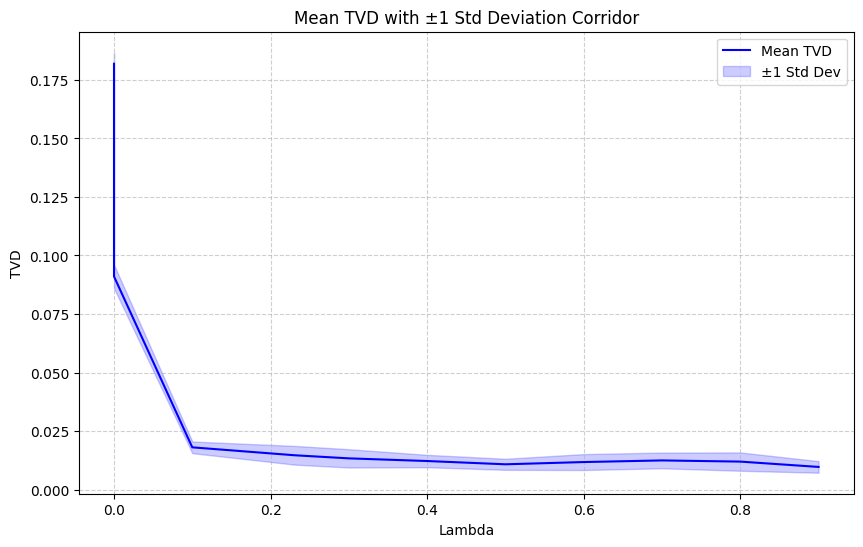

In [ ]:
plot_stats(lambdas=lambdas, stats=benford_tvd_stats, value_name='TVD')

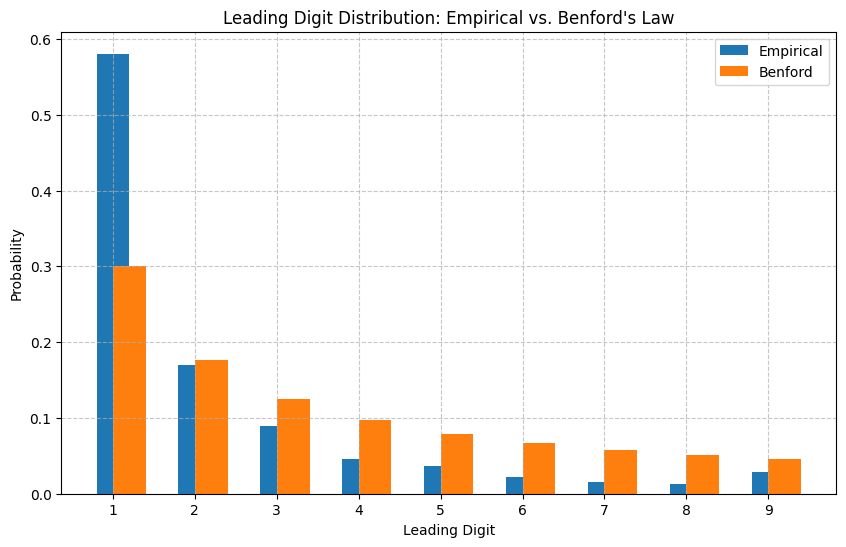

Test Results (Benford TVD Analysis)


In [ ]:
# Load the dataset (City Population accross the Globe by the Year)
url = 'https://datahub.io/core/population-city/r/unsd-citypopulation-year-both.csv'
df = pd.read_csv(url)

# Filter for the most recent year available
latest_year = '2023'
df_latest = df[df['Year'] == latest_year]

# Extract population values and drop missing or non-numeric entries
populations = pd.to_numeric(df_latest['Value'], errors='coerce').dropna().astype(int)

# Compare to Benford's distribution
city_pop_analysis_benford = tvd_analysis_benford(populations)
tools.display_dataframe_to_user(name="Test Results (Benford TVD Analysis)", dataframe=city_pop_analysis_benford)

Generating 596 binary numbers with probabilities:
p_0 = 0.4726555, p_1 = 0.4726555, p_S = 0.05468899999999999
Lambda = 0.24511381445157215


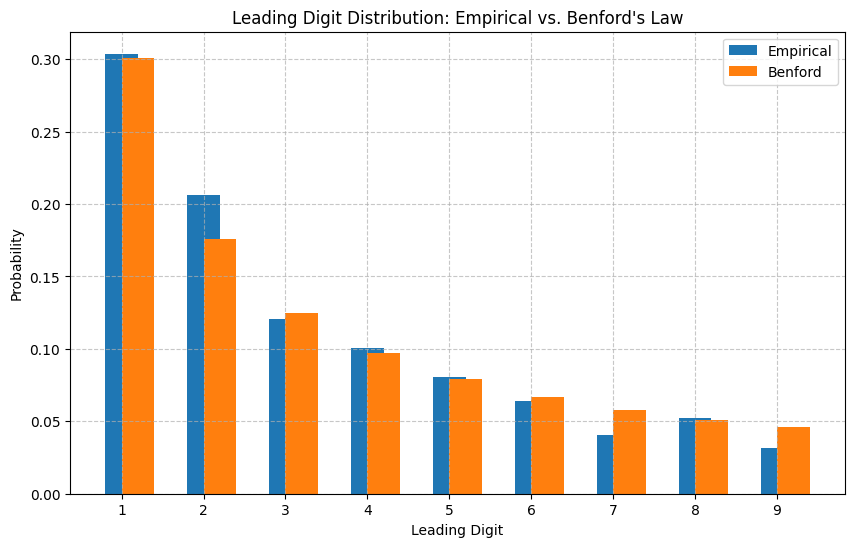

Test Results (Benford TVD Analysis)


In [ ]:
N = 25
p_S_empirical = 0.054689
l = (1-p_S_empirical)**N
_ = run_experiments_benford(num_numbers=len(populations), N=N, lambdas=[l])